In [30]:
#  Importing used libraries
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from plotnine import *
plt.style.use('default')

In [31]:
# Data
house_prices_data = pd.read_csv("signals/house_price_uk.csv", sep = ',') #House prices in UK
temperature_seoul_data = pd.read_csv("signals/temperature_seoul.csv", skiprows=1) # Temperature in Seoul
gas_prices_data = pd.read_csv("signals/gas_prices_monthly.csv", sep = ',') # Natural gas prices
vaccination_data = pd.read_csv("signals/country_vaccinations.csv", sep = ',') # World Vaccination progress
unemployment_data = pd.read_csv("signals/us_unemployment.csv", sep = ',') # US unemployment level

In [32]:
# Grouping data (by years or months).
# No need to modify unemployment data, as it is already grouped by year.

# Grouping house prices data by years, and getting max value of each year.
house_prices_data['Date'] = pd.to_datetime(house_prices_data.Date, format='%Y-%m-%d')
house_prices_data = house_prices_data.groupby(pd.Grouper(key='Date', axis=0, 
                      freq='Y')).max().reset_index()

# Grouping gas prices data by years, and getting max value of each year.
gas_prices_data['Month'] = pd.to_datetime(gas_prices_data.Month, format='%Y-%m')
gas_prices_data = gas_prices_data.groupby(pd.Grouper(key='Month', axis=0, 
                      freq='M')).max().reset_index()

# Grouping vaccinations in Lithuania by months, and getting sum of each month.
# For vaccination data - only Lithuania.
vaccination_data = vaccination_data[vaccination_data['location'] == 'Lithuania']
vaccination_data['date'] = pd.to_datetime(vaccination_data['date'], format='%Y-%m-%d')

# vaccination_data = vaccination_data.groupby(pd.Grouper(key='date', axis=0, 
#                       freq='M')).sum().reset_index()

# Grouping Seoul temperature data by months, and getting max value of each month.
temperature_seoul_data['Date'] = pd.to_datetime(temperature_seoul_data.Date, format='%Y-%m-%d')
temperature_seoul_data = temperature_seoul_data.groupby(pd.Grouper(key='Date', axis=0, 
                      freq='M')).max().reset_index()

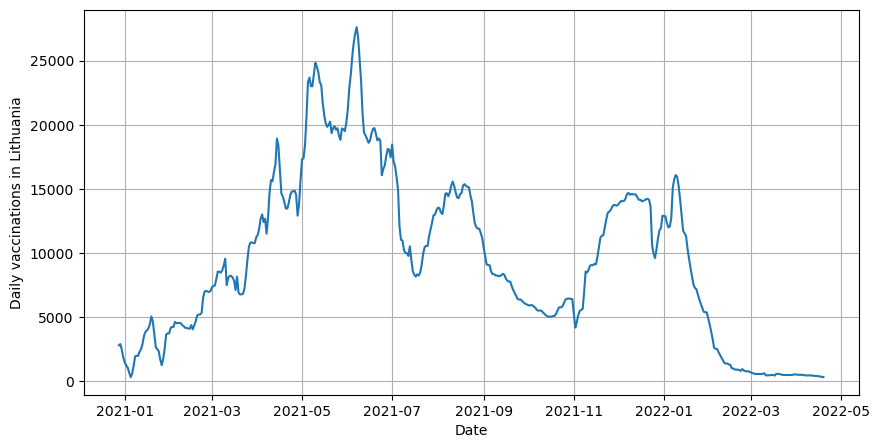

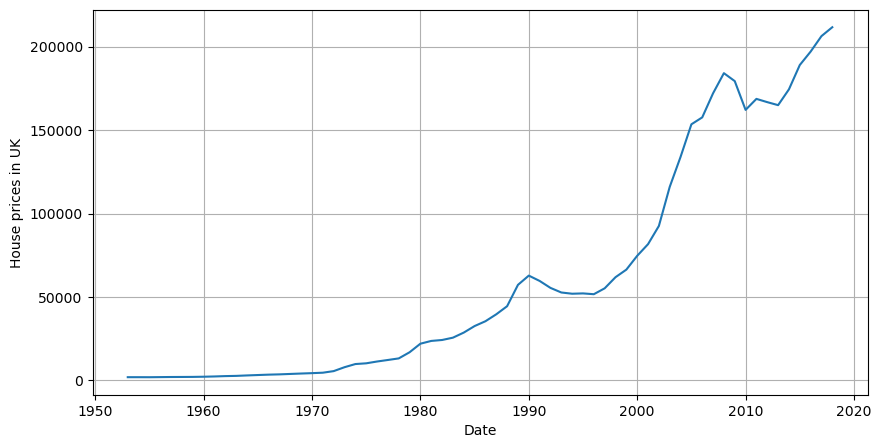

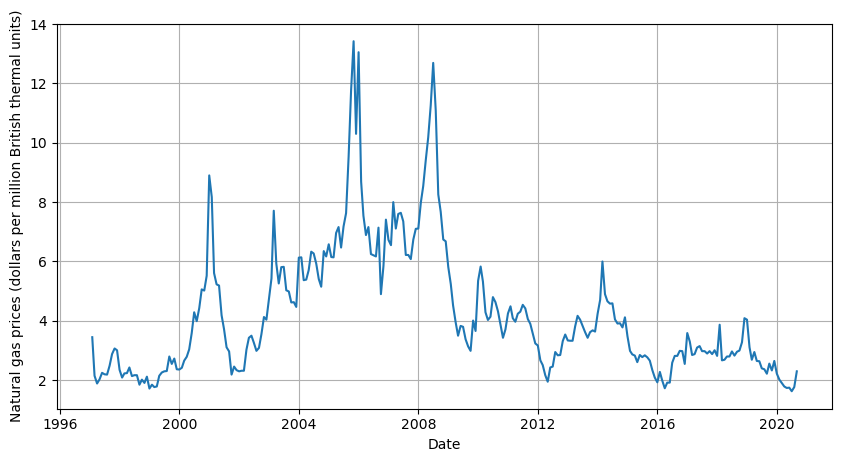

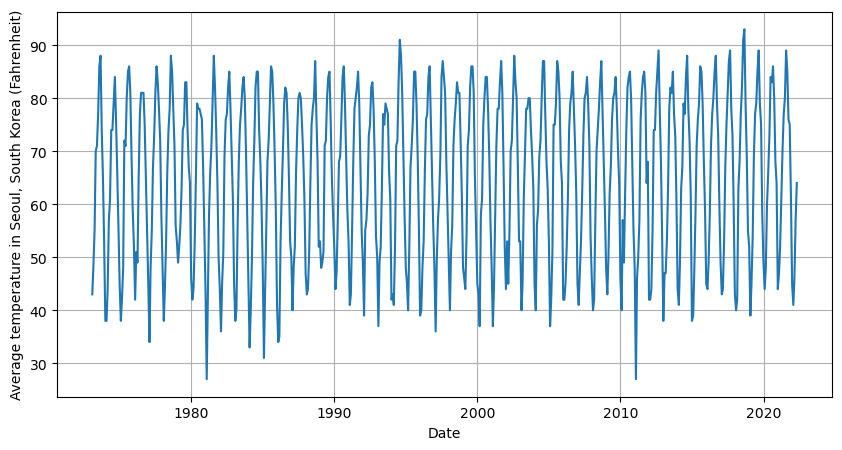

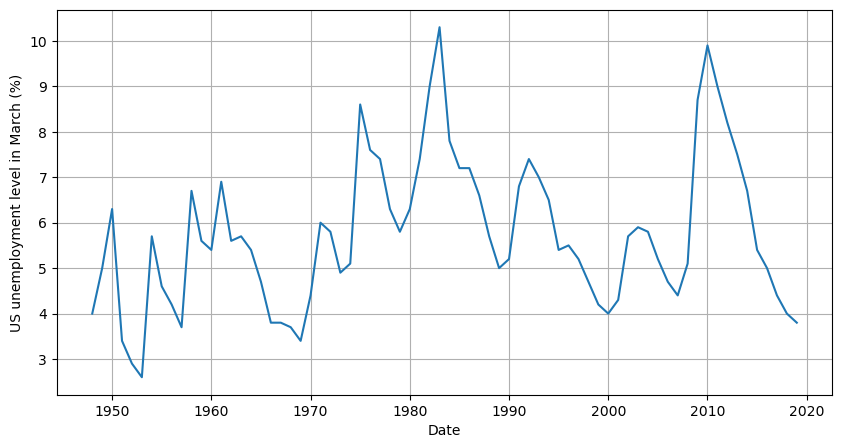

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(vaccination_data['date'], vaccination_data['daily_vaccinations'])
plt.xlabel('Date')
plt.ylabel('Daily vaccinations in Lithuania')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(house_prices_data['Date'], house_prices_data['Price (All)'])
plt.xlabel('Date')
plt.ylabel('House prices in UK')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(gas_prices_data['Month'], gas_prices_data['Price'])
plt.xlabel('Date')
plt.ylabel('Natural gas prices (dollars per million British thermal units)')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(temperature_seoul_data['Date'], temperature_seoul_data['TAVG (Degrees Fahrenheit)'])
plt.xlabel('Date')
plt.ylabel('Average temperature in Seoul, South Korea (Fahrenheit)')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(unemployment_data['Year'], unemployment_data['Mar'])
plt.xlabel('Date')
plt.ylabel('US unemployment level in March (%)')
plt.grid()
plt.show()

In [34]:

# Autocorrelation algorithm
def calculate_f_mean(f, N, d):
  sum = 0
  for i in range (0, N - d + 1):
    sum += f[i]
  return 1 / (N - d + 1) * sum

def calculateTop(f, f_, F_, N, d):
  sum = 0
  for j in range(0, N - d):
    sum += (f[j] - f_)*(f[d+j] - F_)
  return sum

def calculateBottom(f, f_, F_, N, d):
  sum1 = 0
  sum2 = 0
  for j in range(0, N - d):
    sum1 += (f[j] - f_) ** 2
    sum2 += (f[d+j] - F_) ** 2
  return np.sqrt(sum1 * sum2)

def autocorrelation_function(series):

  N = np.array(series).size - 1 # Number of observations
  delays = int(N / 2)  # Number of delays (lags)
  delay = np.arange(start=0, stop = delays, step = 1) # Array of d values (0,1,2...N/2)
  corr = np.zeros(delays) # creating empty array for r(d) values

  for d in range (0, delays):
    # (34th equation). Since in python range last element is not included, adding + 1. 
    f_ = calculate_f_mean(series[0 : N - d + 1], N, d)
    F_ = calculate_f_mean(series[d : N + 1], N, d)
    top = calculateTop(series, f_, F_, N, d)
    bottom = calculateBottom(series, f_, F_, N, d) 
    corr[d] = top/bottom

  return delay, corr

In [35]:
# Moving average function (pandas dataframe)
# For 10 day/month/year moving average window = 10.
def moving_average(dataFrameColumn, window):
  return dataFrameColumn.rolling(window).mean()

**SIGNAL 1. HOUSE PRICES DATA**

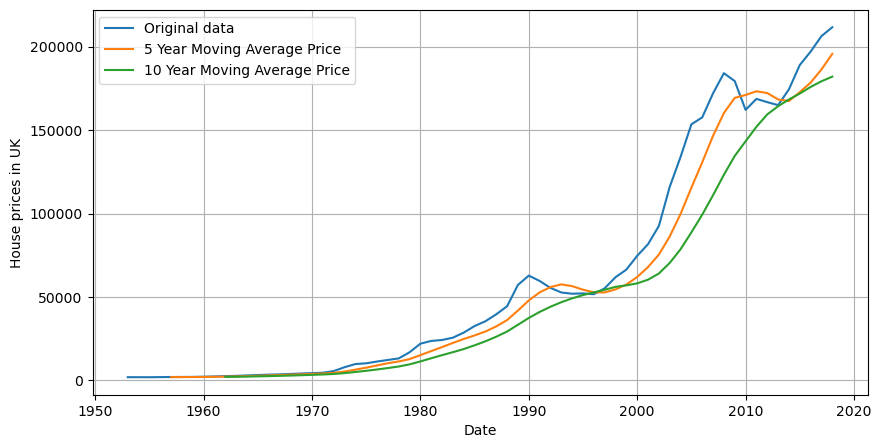

In [36]:
# Moving average1: MA1 - 5 years
# Moving average2: MA2 - 10 years
MA1 = 5
MA2 = 10
house_prices_data["MA1"] = moving_average(house_prices_data['Price (All)'], MA1)
house_prices_data["MA2"] = moving_average(house_prices_data['Price (All)'], MA2)

plt.figure(figsize=(10, 5))
plt.plot(house_prices_data['Date'], house_prices_data['Price (All)'],  label='Original data')
plt.plot(house_prices_data['Date'], house_prices_data['MA1'], label= str(MA1) + ' Year Moving Average Price')
plt.plot(house_prices_data['Date'], house_prices_data['MA2'], label= str(MA2) + ' Year Moving Average Price')

plt.xlabel('Date')
plt.ylabel('House prices in UK')

plt.grid()
plt.legend()
# house_prices_data.head(20)

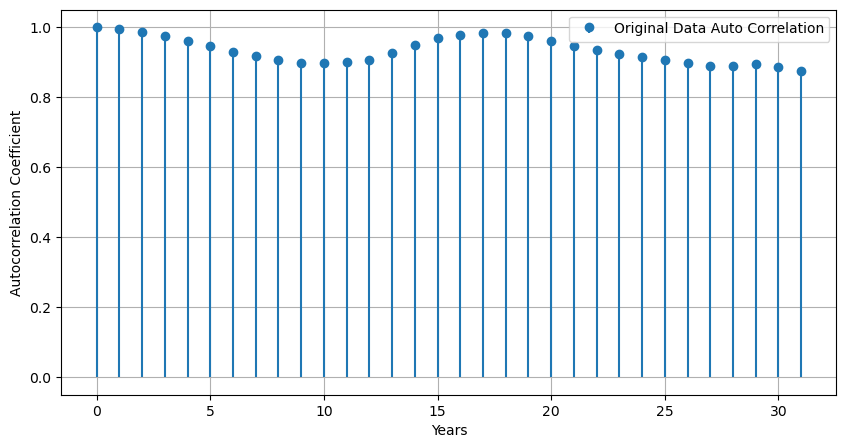

In [37]:
d, r_d = autocorrelation_function(house_prices_data['Price (All)'].to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label='Original Data Auto Correlation', use_line_collection = True)


plt.xlabel('Years')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

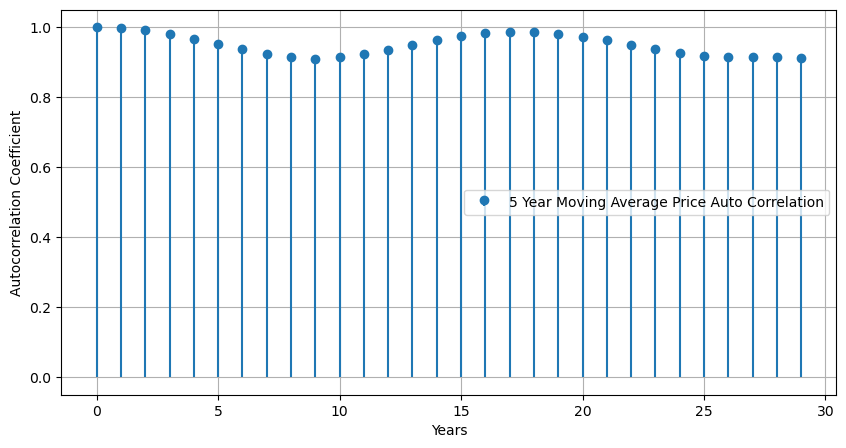

In [38]:
d, r_d = autocorrelation_function(house_prices_data['MA1'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label=str(MA1) + ' Year Moving Average Price Auto Correlation', use_line_collection = True)

plt.xlabel('Years')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

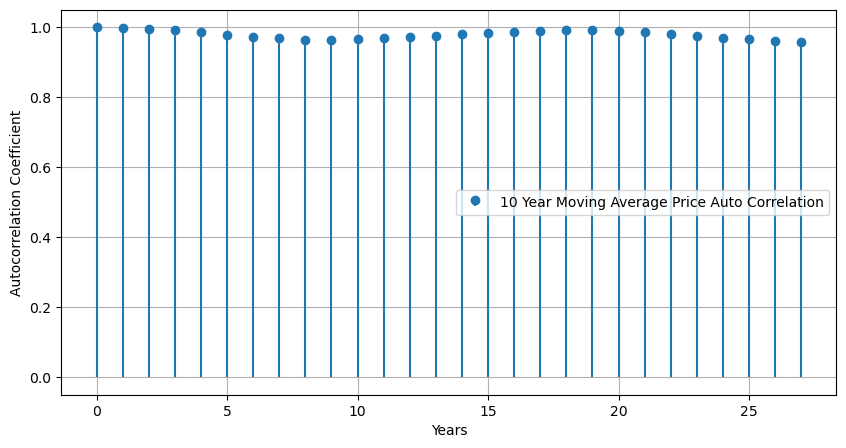

In [39]:
d, r_d = autocorrelation_function(house_prices_data['MA2'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label=str(MA2) + ' Year Moving Average Price Auto Correlation', use_line_collection = True)

plt.xlabel('Years')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

**Signal 2. Vaccinations**

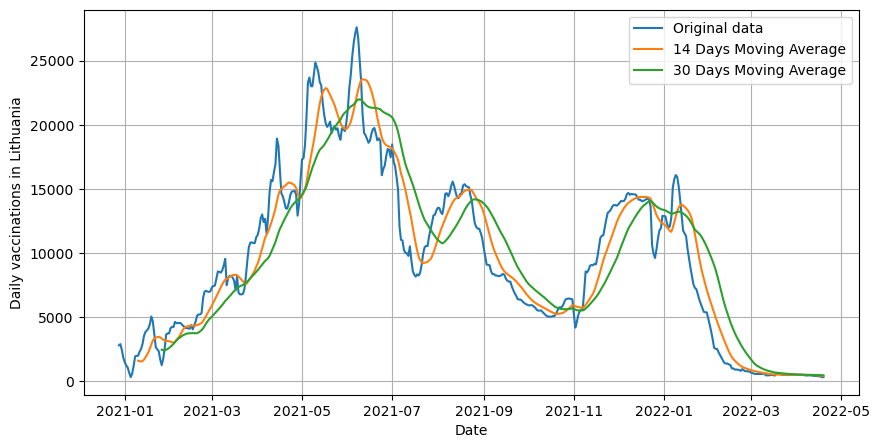

In [40]:
# Moving average1: MA1 - 14 days
# Moving average2: MA2 - 30 days
MA1 = 14
MA2 = 30

vaccination_data["MA1"] = moving_average(vaccination_data['daily_vaccinations'], MA1)
vaccination_data["MA2"] = moving_average(vaccination_data['daily_vaccinations'], MA2)

plt.figure(figsize=(10, 5))
plt.plot(vaccination_data['date'], vaccination_data['daily_vaccinations'],  label='Original data')
plt.plot(vaccination_data['date'], vaccination_data['MA1'], label=str(MA1) + ' Days Moving Average')
plt.plot(vaccination_data['date'], vaccination_data['MA2'], label=str(MA2) + ' Days Moving Average')

plt.xlabel('Date')
plt.ylabel('Daily vaccinations in Lithuania')

plt.grid()
plt.legend()

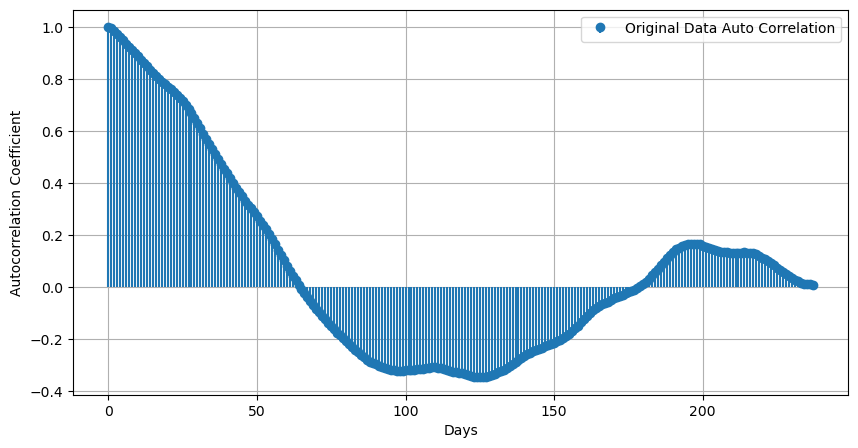

In [41]:
d, r_d = autocorrelation_function(vaccination_data['daily_vaccinations'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label='Original Data Auto Correlation', use_line_collection = True)

plt.xlabel('Days')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

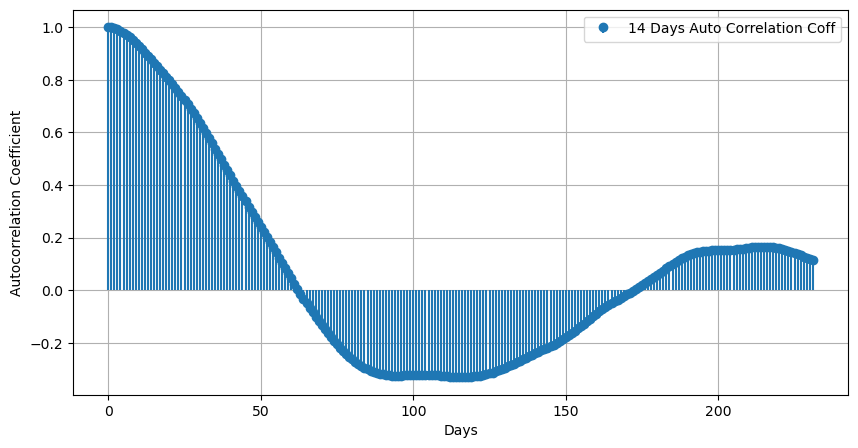

In [42]:
d, r_d = autocorrelation_function(vaccination_data['MA1'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label=str(MA1) + ' Days Auto Correlation Coff', use_line_collection = True)

plt.xlabel('Days')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

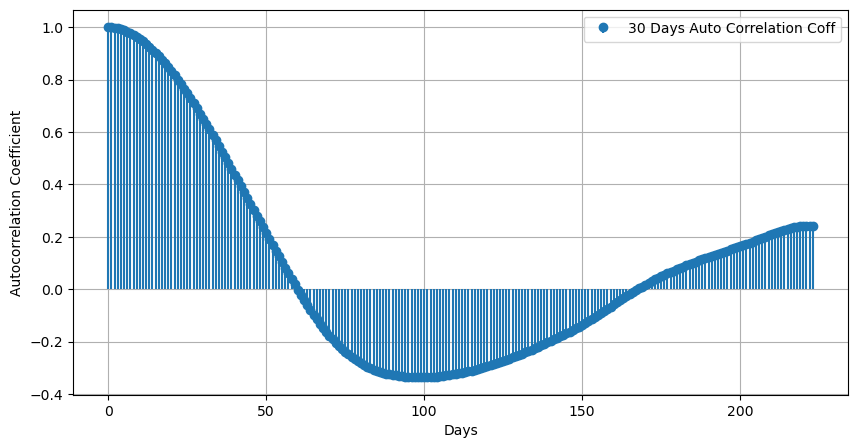

In [43]:
d, r_d = autocorrelation_function(vaccination_data['MA2'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label=str(MA2) + ' Days Auto Correlation Coff', use_line_collection = True)

plt.xlabel('Days')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

**3. Signal. Natural Gas Prices**

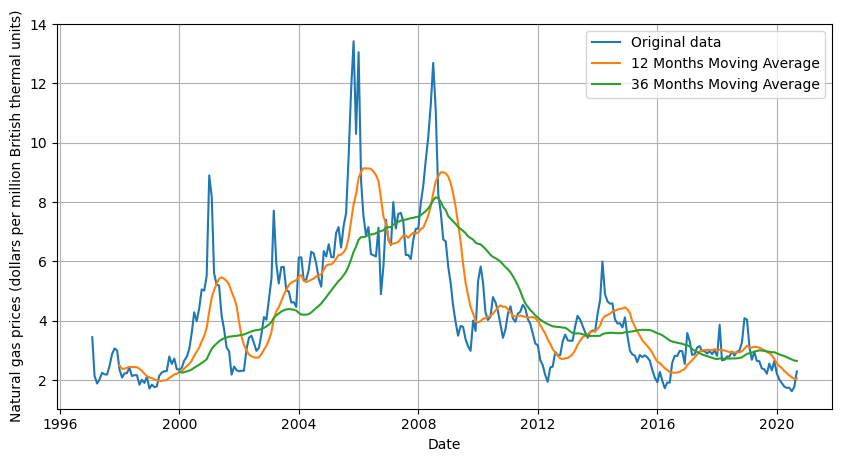

In [44]:
# Moving average1 : MA1 - 12 months
# Moving average2: MA2 - 36 months
MA1 = 12
MA2 = 36

gas_prices_data["MA1"] = moving_average(gas_prices_data['Price'], MA1)
gas_prices_data["MA2"] = moving_average(gas_prices_data['Price'], MA2)

plt.figure(figsize=(10, 5))
plt.plot(gas_prices_data['Month'], gas_prices_data['Price'],  label='Original data')
plt.plot(gas_prices_data['Month'], gas_prices_data['MA1'], label=str(MA1) + ' Months Moving Average')
plt.plot(gas_prices_data['Month'], gas_prices_data['MA2'], label=str(MA2) + ' Months Moving Average')

plt.xlabel('Date')
plt.ylabel('Natural gas prices (dollars per million British thermal units)')

plt.grid()
plt.legend()


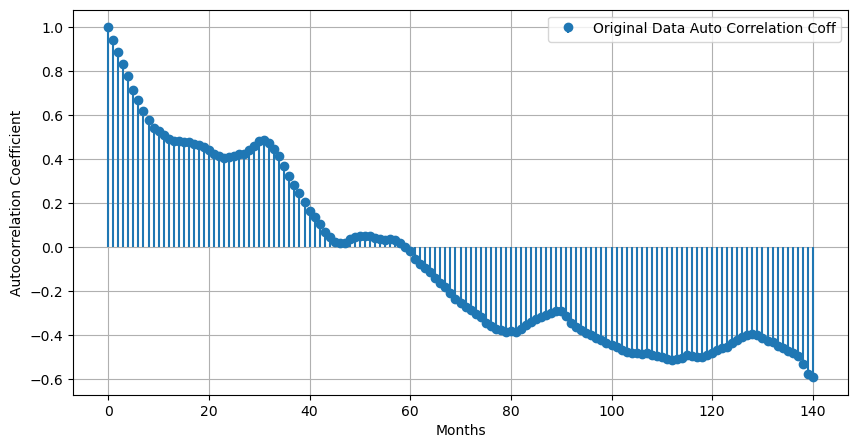

In [45]:
d, r_d = autocorrelation_function(gas_prices_data['Price'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label='Original Data Auto Correlation Coff', use_line_collection = True)


plt.xlabel('Months')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

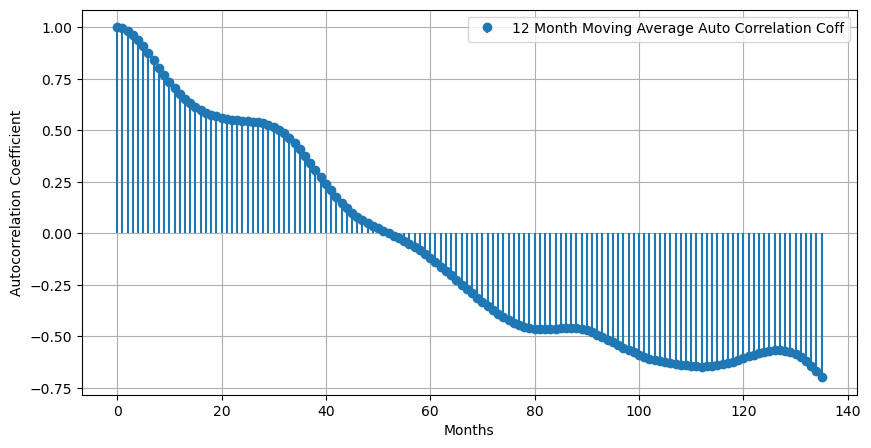

In [46]:
d, r_d = autocorrelation_function(gas_prices_data['MA1'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label=str(MA1) + ' Month Moving Average Auto Correlation Coff', use_line_collection = True)


plt.xlabel('Months')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

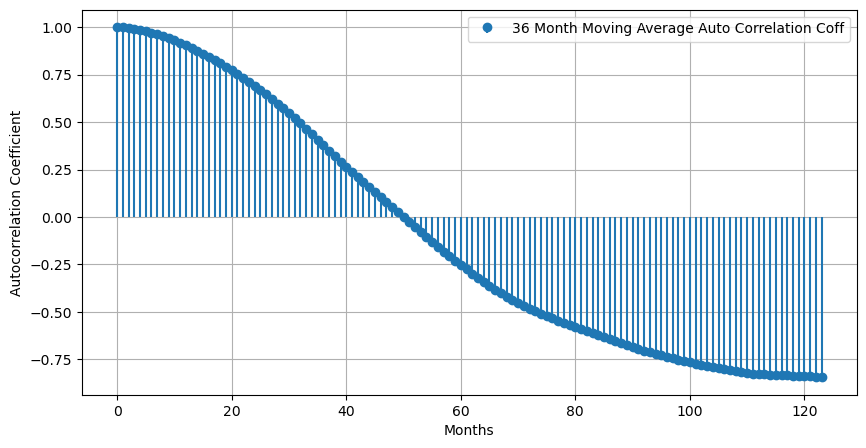

In [47]:
d, r_d = autocorrelation_function(gas_prices_data['MA2'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label=str(MA2) + ' Month Moving Average Auto Correlation Coff', use_line_collection = True)


plt.xlabel('Months')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

**4. Signal. US Unemployment**

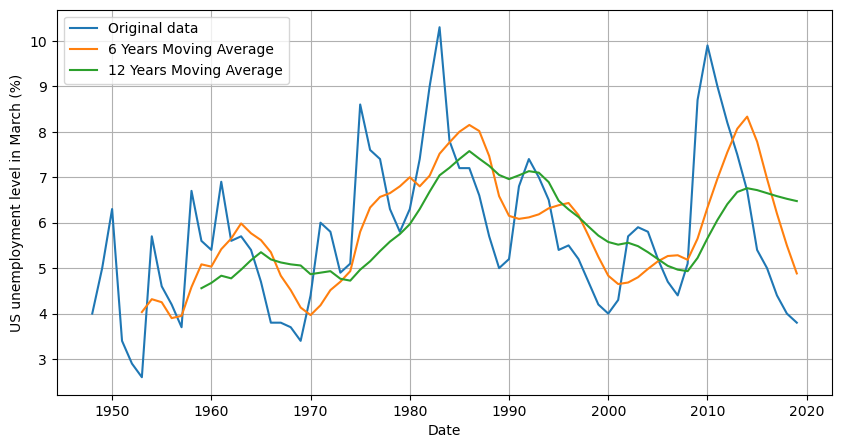

In [48]:
# Moving average1 : MA1 - 6 years
# Moving average2: MA2 - 12 years
MA1 = 6
MA2 = 12

unemployment_data["MA1"] = moving_average(unemployment_data['Mar'], MA1)
unemployment_data["MA2"] = moving_average(unemployment_data['Mar'], MA2)

plt.figure(figsize=(10, 5))
plt.plot(unemployment_data['Year'], unemployment_data['Mar'],  label='Original data')
plt.plot(unemployment_data['Year'], unemployment_data['MA1'], label=str(MA1) + ' Years Moving Average')
plt.plot(unemployment_data['Year'], unemployment_data['MA2'], label=str(MA2) + ' Years Moving Average')

plt.xlabel('Date')
plt.ylabel('US unemployment level in March (%)')

plt.grid()
plt.legend()

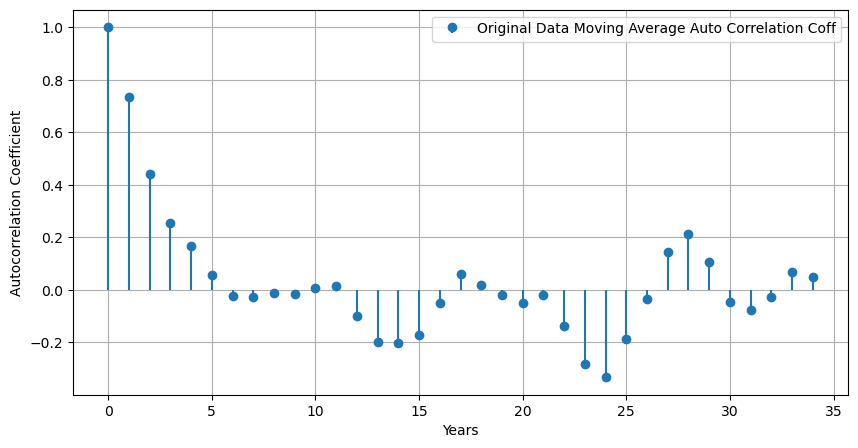

In [49]:
d, r_d = autocorrelation_function(unemployment_data['Mar'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label='Original Data Moving Average Auto Correlation Coff', use_line_collection = True)


plt.xlabel('Years')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

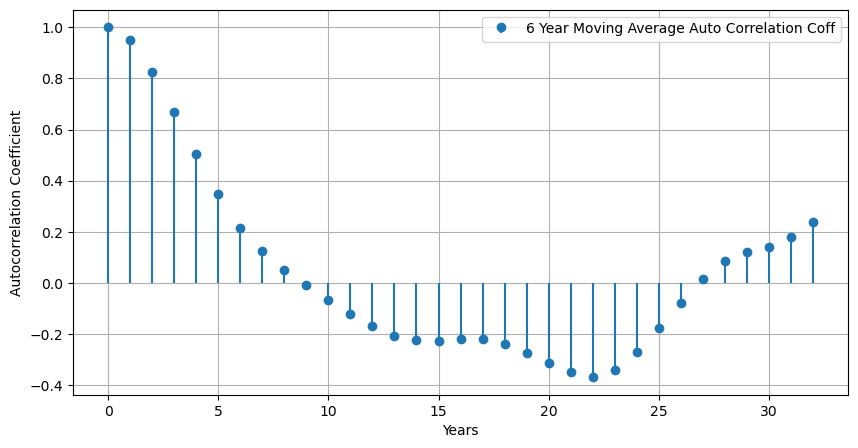

In [50]:
d, r_d = autocorrelation_function(unemployment_data['MA1'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label=str(MA1) + ' Year Moving Average Auto Correlation Coff', use_line_collection = True)


plt.xlabel('Years')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

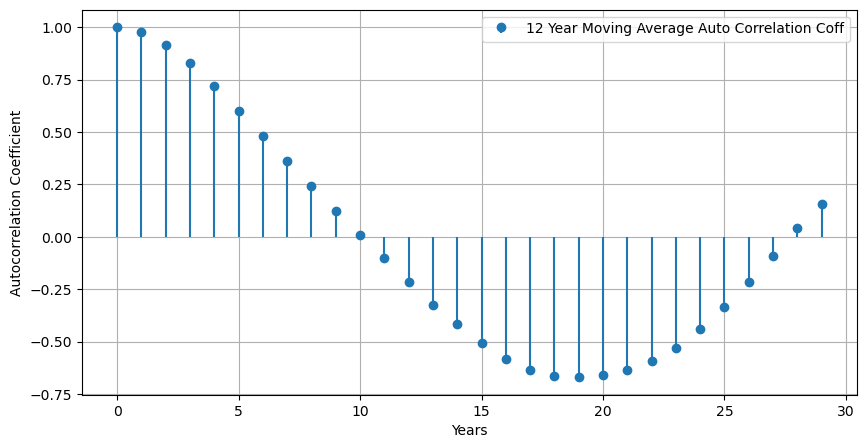

In [51]:
d, r_d = autocorrelation_function(unemployment_data['MA2'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(10, 5))
plt.stem(d, r_d, basefmt=" ", label=str(MA2) + ' Year Moving Average Auto Correlation Coff', use_line_collection = True)


plt.xlabel('Years')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

**Signal 5. Temperature in Seoul**

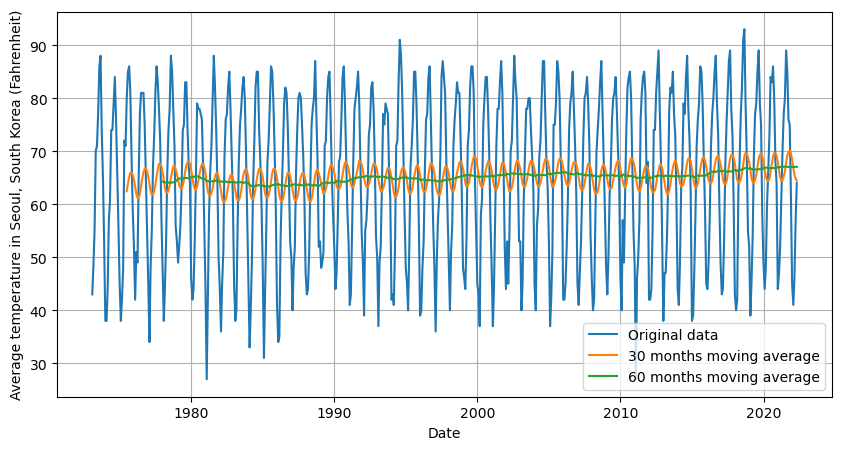

In [52]:
# Moving average1 : MA1 - 30 months
# Moving average2: MA2 - 60 months
MA1 = 30
MA2 = 60

temperature_seoul_data["MA1"] = moving_average(temperature_seoul_data['TAVG (Degrees Fahrenheit)'], MA1)
temperature_seoul_data["MA2"] = moving_average(temperature_seoul_data['TAVG (Degrees Fahrenheit)'], MA2)

plt.figure(figsize=(10, 5))
plt.plot(temperature_seoul_data['Date'], temperature_seoul_data['TAVG (Degrees Fahrenheit)'],  label='Original data')
plt.plot(temperature_seoul_data['Date'], temperature_seoul_data['MA1'], label=str(MA1) + ' months moving average')
plt.plot(temperature_seoul_data['Date'], temperature_seoul_data['MA2'], label=str(MA2) + ' months moving average')

plt.xlabel('Date')
plt.ylabel('Average temperature in Seoul, South Korea (Fahrenheit)')

plt.grid()
plt.legend()

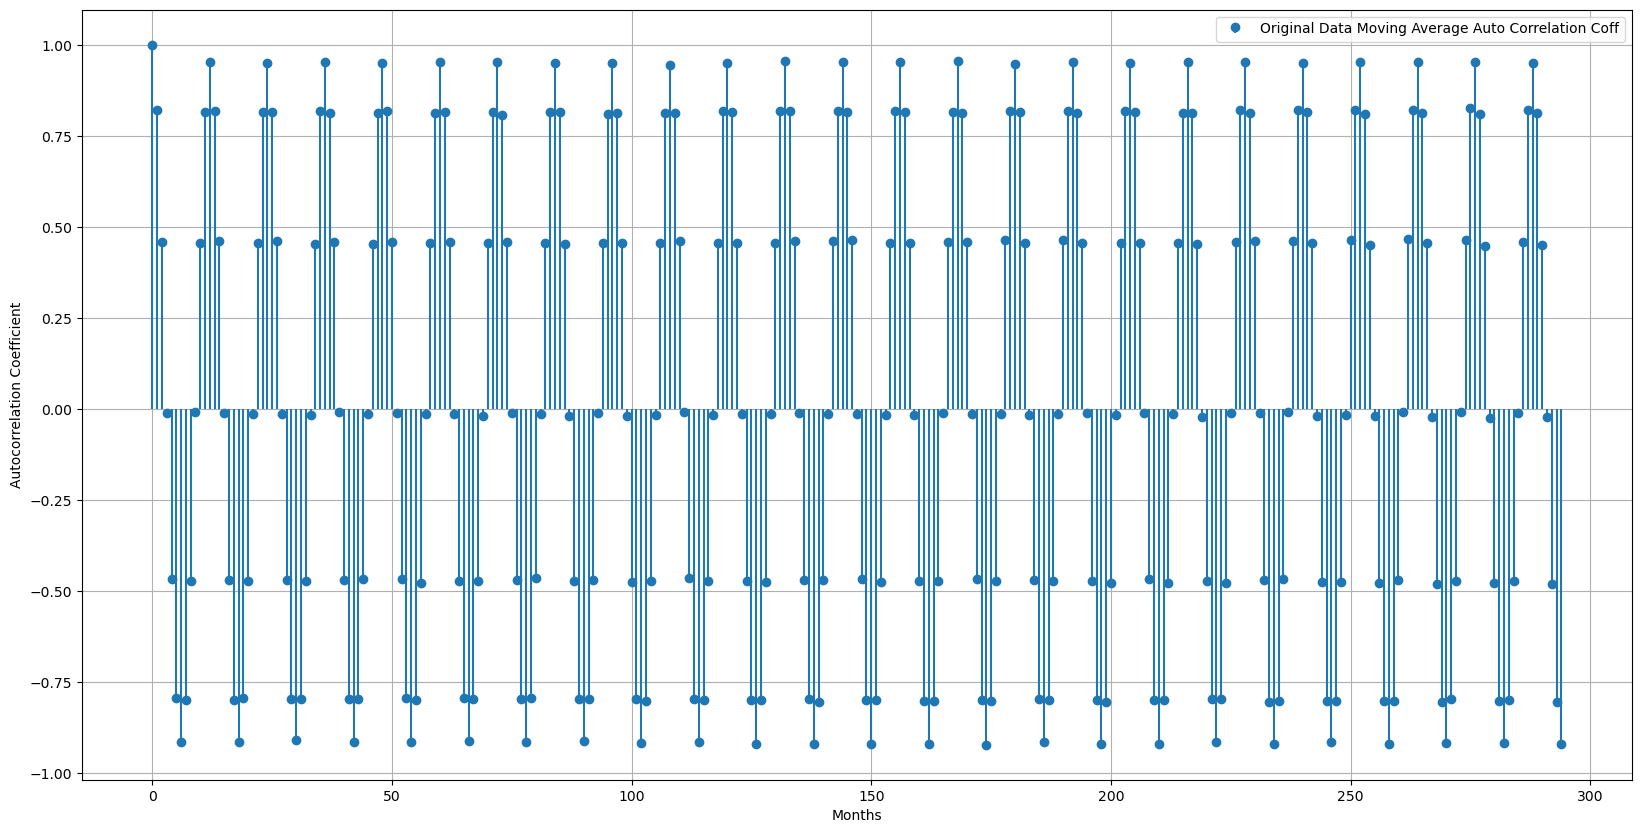

In [53]:
d, r_d = autocorrelation_function(temperature_seoul_data['TAVG (Degrees Fahrenheit)'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(20, 10))
plt.stem(d, r_d, basefmt=" ", label='Original Data Moving Average Auto Correlation Coff', use_line_collection = True)


plt.xlabel('Months')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

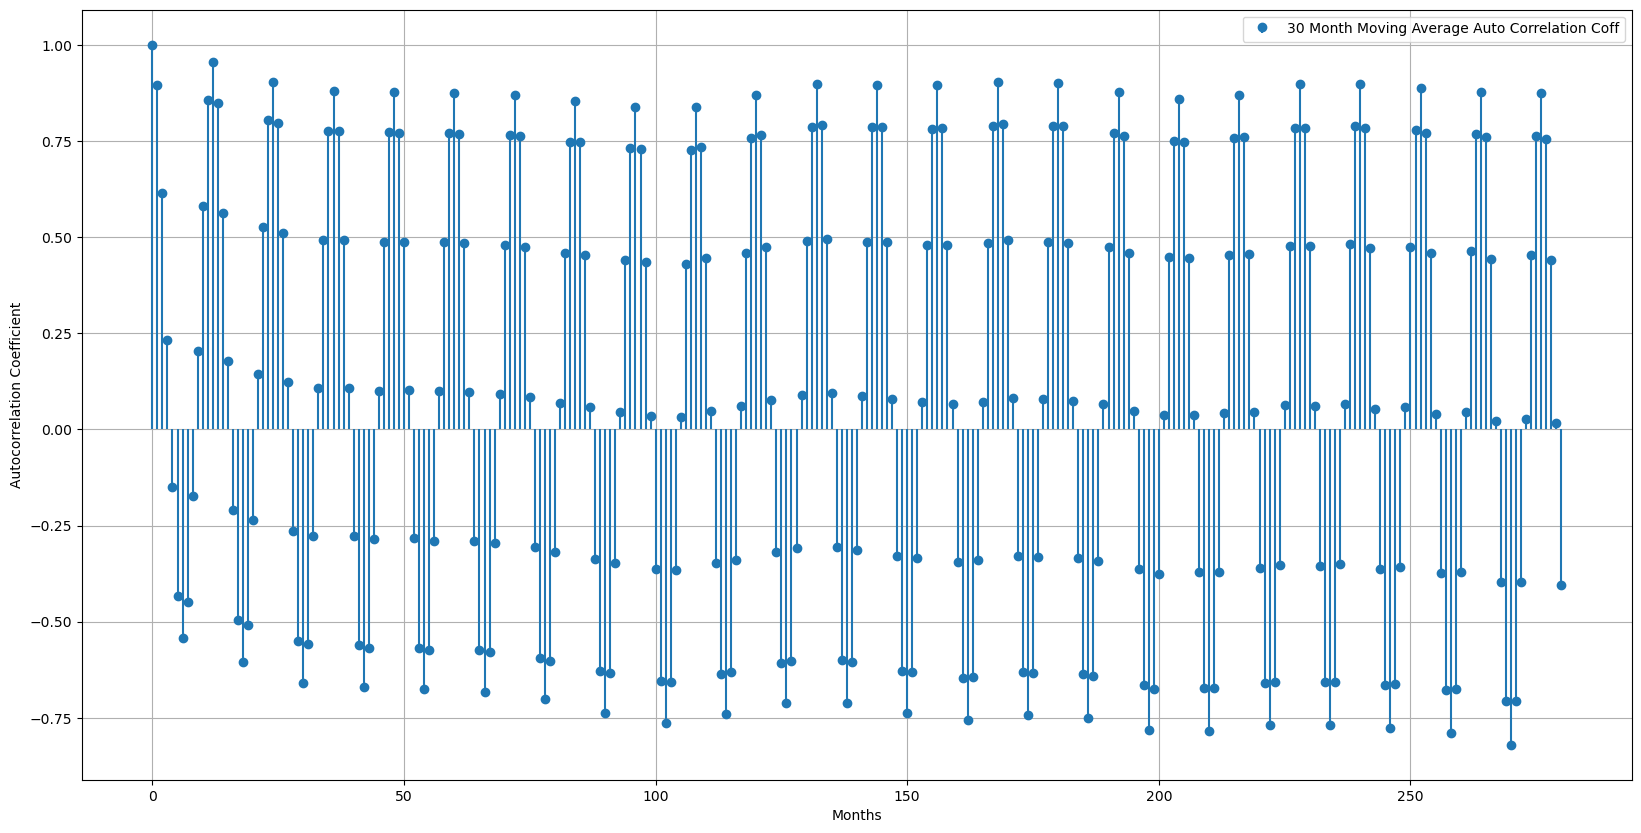

In [54]:
d, r_d = autocorrelation_function(temperature_seoul_data['MA1'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(20, 10))
plt.stem(d, r_d, basefmt=" ", label=str(MA1) + ' Month Moving Average Auto Correlation Coff', use_line_collection = True)


plt.xlabel('Months')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

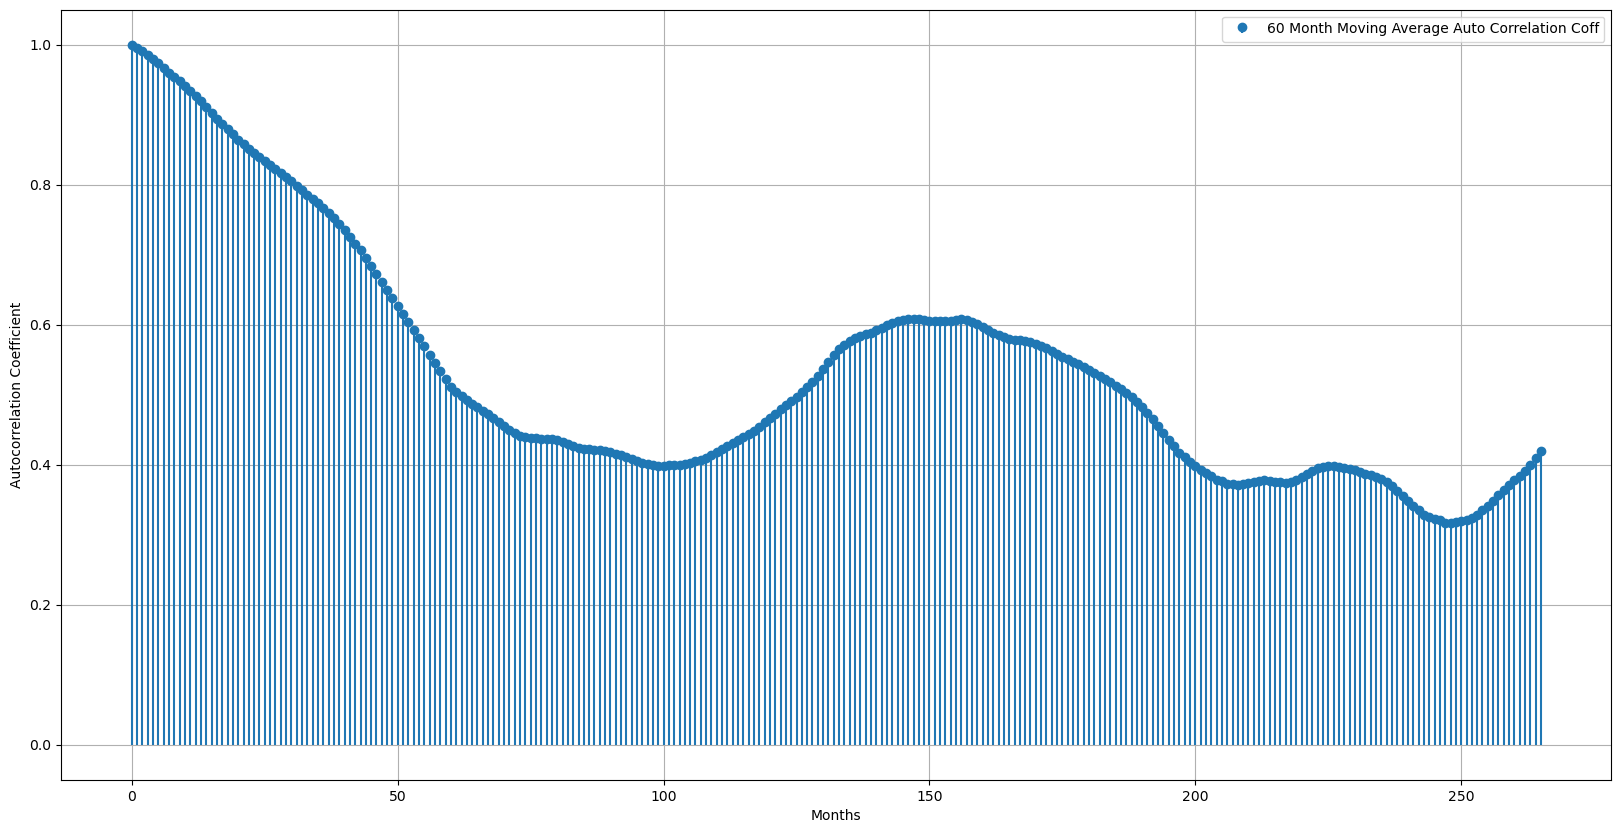

In [55]:
d, r_d = autocorrelation_function(temperature_seoul_data['MA2'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(20, 10))
plt.stem(d, r_d, basefmt=" ", label=str(MA2) + ' Month Moving Average Auto Correlation Coff', use_line_collection = True)


plt.xlabel('Months')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()

/tmp/ipykernel_5748/2727580393.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_5748/2727580393.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_5748/2727580393.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


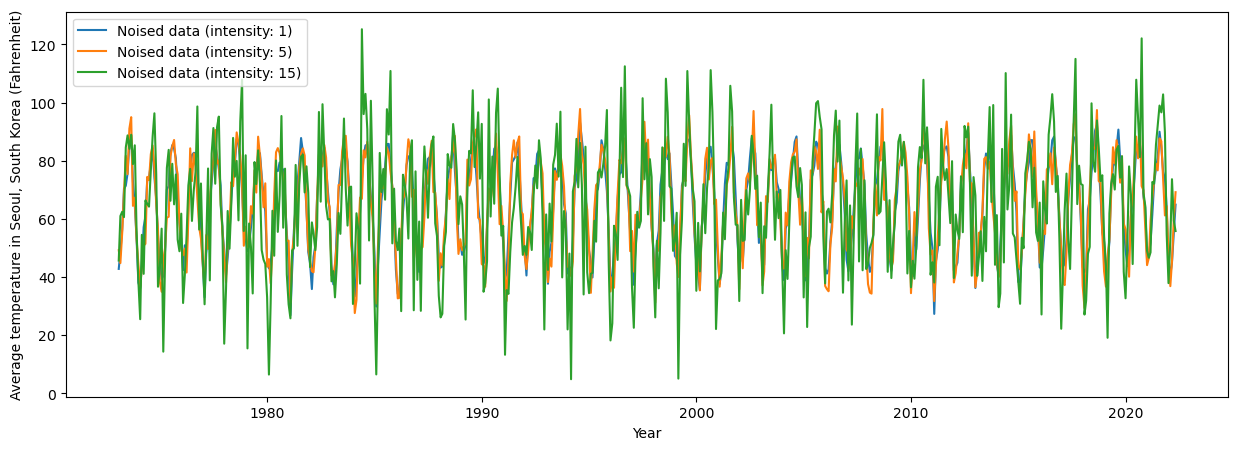

In [56]:
# 0 – mean of the chosen normal distribution
# 1, 5, 15, etc. – intensity (standard deviation)
noise_1 = np.random.normal(0, 1, len(temperature_seoul_data))
noise_2 = np.random.normal(0, 5, len(temperature_seoul_data))
noise_3 = np.random.normal(0, 15, len(temperature_seoul_data))

temperature_seoul_data_noised_1 = temperature_seoul_data.copy()
temperature_seoul_data_noised_2 = temperature_seoul_data.copy()
temperature_seoul_data_noised_3 = temperature_seoul_data.copy()

plt.figure(figsize=(15, 5))

for k in range (0, len(temperature_seoul_data)):
  temperature_seoul_data_noised_1['TAVG (Degrees Fahrenheit)'][k] += noise_1[k]
plt.plot(temperature_seoul_data_noised_1['Date'], temperature_seoul_data_noised_1['TAVG (Degrees Fahrenheit)'],  label='Noised data (intensity: 1)')

for k in range (0, len(temperature_seoul_data)):
  temperature_seoul_data_noised_2['TAVG (Degrees Fahrenheit)'][k] += noise_2[k]
plt.plot(temperature_seoul_data_noised_2['Date'], temperature_seoul_data_noised_2['TAVG (Degrees Fahrenheit)'],  label='Noised data (intensity: 5)')

for k in range (0, len(temperature_seoul_data)):
  temperature_seoul_data_noised_3['TAVG (Degrees Fahrenheit)'][k] += noise_3[k]
plt.plot(temperature_seoul_data_noised_3['Date'], temperature_seoul_data_noised_3['TAVG (Degrees Fahrenheit)'],  label='Noised data (intensity: 15)')
plt.xlabel("Year")
plt.ylabel("Average temperature in Seoul, South Korea (Fahrenheit)")
plt.legend()
plt.show()


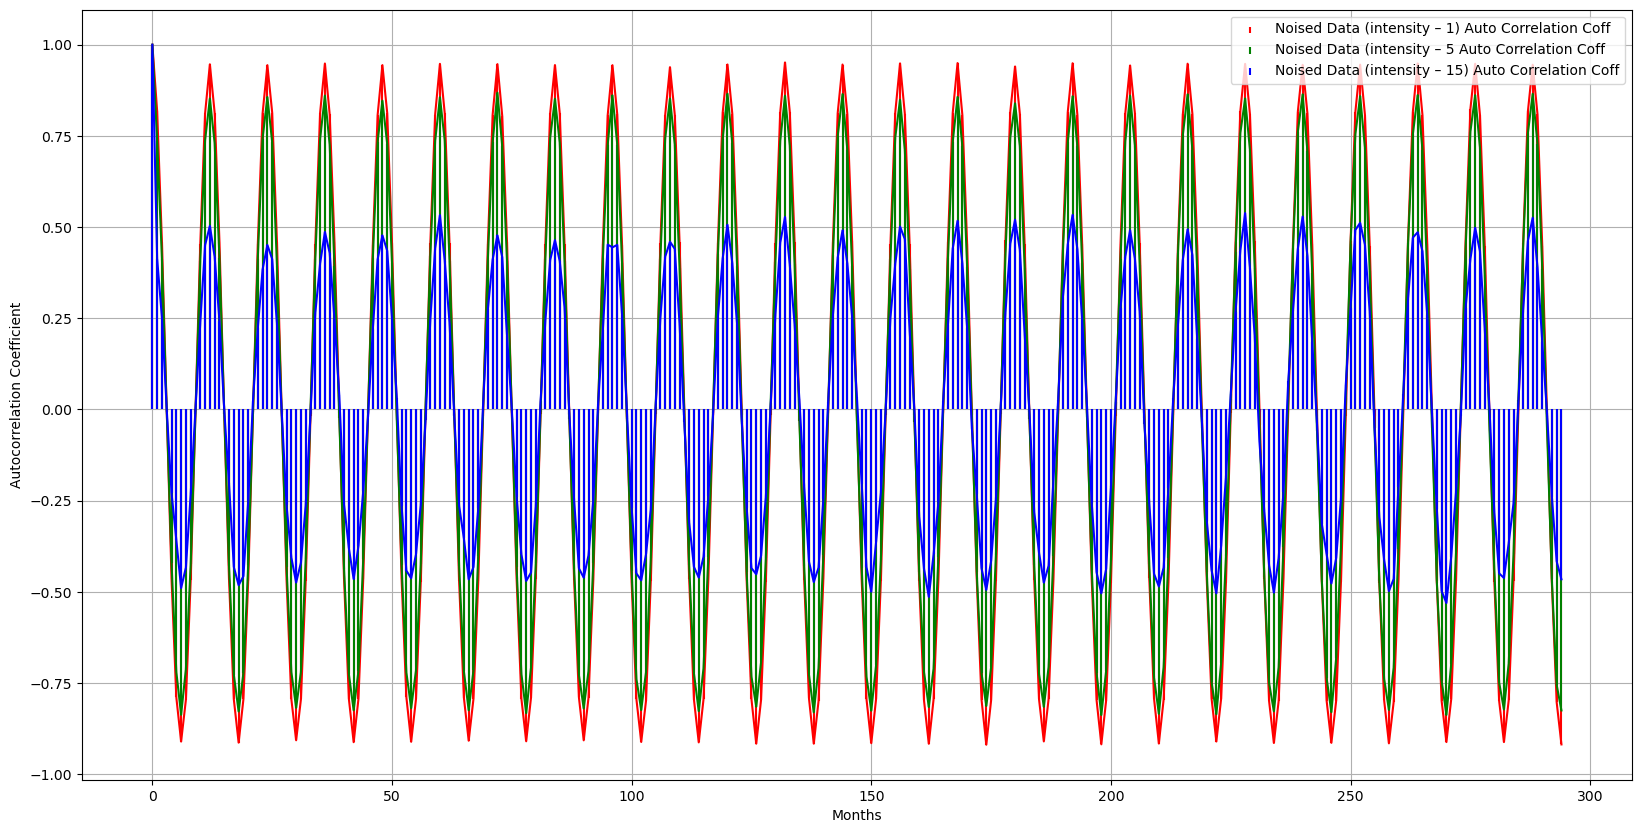

In [57]:
d1, r_d1 = autocorrelation_function(temperature_seoul_data_noised_1['TAVG (Degrees Fahrenheit)'].dropna().to_numpy())
d2, r_d2 = autocorrelation_function(temperature_seoul_data_noised_2['TAVG (Degrees Fahrenheit)'].dropna().to_numpy())
d3, r_d3 = autocorrelation_function(temperature_seoul_data_noised_3['TAVG (Degrees Fahrenheit)'].dropna().to_numpy())

# Plot autocorrelation
plt.figure(figsize=(20, 10))
plt.stem(d1, r_d1, basefmt=" ", label='Noised Data (intensity – 1) Auto Correlation Coff', use_line_collection = True, markerfmt= 'r', linefmt='r')
plt.stem(d2, r_d2, basefmt=" ", label='Noised Data (intensity – 5 Auto Correlation Coff', use_line_collection = True, markerfmt='g', linefmt='g')
plt.stem(d3, r_d3, basefmt=" ", label='Noised Data (intensity – 15) Auto Correlation Coff', use_line_collection = True, markerfmt='b', linefmt='b')


plt.xlabel('Months')
plt.ylabel('Autocorrelation Coefficient')

plt.grid()
plt.legend()